In [ ]:
# Installs
!pip install folium

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import folium
import json, requests

In [52]:
india_data_json = requests.get('https://api.rootnet.in/covid19-in/unofficial/covid19india.org/statewise').json()
df_india = pd.io.json.json_normalize(india_data_json['data']['statewise'])
df_india = df_india.set_index("state")

In [53]:
df_india=df_india.drop(index="State Unassigned",axis=0)
df_india

confirmed  recovered  deaths  active
state                                                                         
Maharashtra                                 1648665    1470660   43348  134137
Andhra Pradesh                               808924     773548    6606   28770
Karnataka                                    805947     719558   10947   75423
Tamil Nadu                                   711713     671489   10956   29268
Uttar Pradesh                                472068     438512    6902   26654
Delhi                                        359488     327390    6312   25786
Kerala                                       397218     302017    1353   93745
West Bengal                                  353822     310086    6546   37190
Odisha                                       282695     266105    1312   15278
Telangana                                    231834     211912    1311   18611
Bihar                                        212705     202007    1058    9639
Assam                                        204386     188584     908   14891
Rajasthan                                    188048     169962    1853   16233
Gujarat                                      168081     150750    3693   13638
Madhya Pradesh                               167969     154222    2890   10857
Chhattisgarh                                 177608     153654    1861   22093
Haryana                                      159457     147566    1737   10154
Punjab                                       131391     123047    4125    4219
Jharkhand                                     99906      93368     872    5666
Jammu and Kashmir                             92225      83485    1444    7296
Uttarakhand                                   60744      55188    1001    4080
Goa                                           42532      39433     582    2517
Puducherry                                    34336      29990     588    3758
Tripura                                       30254      28046     340    1845
Himachal Pradesh                              20586      17760     288    2508
Manipur                                       17424      13057     144    4223
Chandigarh                                    14085      13230     222     633
Arunachal Pradesh                             14391      12182      35    2174
Meghalaya                                      9020       7332      81    1604
Nagaland                                       8663       6720      27    1833
Ladakh                                         5978       5216      71     691
Andaman and Nicobar Islands                    4253       3997      58     198
Sikkim                                         3840       3448      65     245
Dadra and Nagar Haveli and Daman and Diu       3226       3147       2      51
Mizoram                                        2493       2209       0     284
Lakshadweep                                       0          0       0       0

In [54]:
total = df_india.sum()
total

confirmed    7945975
recovered    7198877
deaths        119538
active        626192
dtype: int64

In [55]:
total = df_india.sum()
total.name = "Total"
df_t = pd.DataFrame(total,dtype=float).transpose()
df_t["Mortality Rate (per 100)"] = np.round(100*df_t["deaths"]/df_t["confirmed"],4)
df_t.style.background_gradient(cmap='Purples',axis=1)

### States with Reported Deaths

In [56]:
df_india["Mortality Rate (per 100)"]= np.round(np.nan_to_num(100*df_india["deaths"]/df_india["confirmed"]),4)
df_india[:].style.background_gradient(cmap='Blues',subset=["confirmed"])\
                        .background_gradient(cmap='Reds',subset=["deaths"])\
                        .background_gradient(cmap='Greens',subset=["recovered"])\
                        .background_gradient(cmap='Purples',subset=["active"])\
                        .background_gradient(cmap='YlOrBr',subset=["Mortality Rate (per 100)"])\
                        .format("{:.2f}",subset=["Mortality Rate (per 100)"])

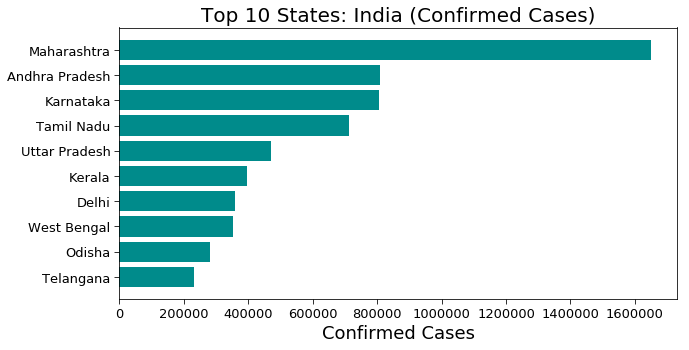

In [57]:
f = plt.figure(figsize=(10,5))
plt.barh(df_india.sort_values('confirmed')["confirmed"].index[-10:],df_india.sort_values('confirmed')["confirmed"].values[-10:],color="darkcyan")
plt.tick_params(size=5,labelsize = 13)
plt.xlabel("Confirmed Cases",fontsize=18)
plt.title("Top 10 States: India (Confirmed Cases)",fontsize=20)
plt.savefig('Top 10 States_India (Confirmed Cases).png')

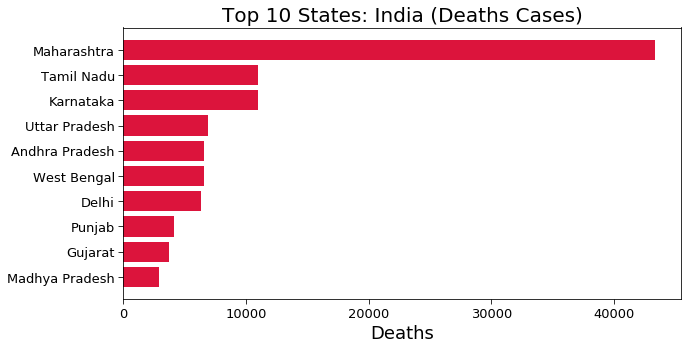

In [58]:
f = plt.figure(figsize=(10,5))
plt.barh(df_india.sort_values('deaths')["deaths"].index[-10:],df_india.sort_values('deaths')["deaths"].values[-10:],color="crimson")
plt.tick_params(size=5,labelsize = 13)
plt.xlabel("Deaths",fontsize=18)
plt.title("Top 10 States: India (Deaths Cases)",fontsize=20)
plt.savefig('Top 10 States_India (Deaths Cases).png')

## Map Visualization (Statewise India)
<hr>

In [59]:
# Adding Location data (Latitude,Longitude)
locations = {
    "Kerala" : [10.8505,76.2711],
    "Maharashtra" : [19.7515,75.7139],
    "Karnataka": [15.3173,75.7139],
    "Telangana": [18.1124,79.0193],
    "Uttar Pradesh": [26.8467,80.9462],
    "Rajasthan": [27.0238,74.2179],
    "Gujarat":[22.2587,71.1924],
    "Delhi" : [28.7041,77.1025],
    "Punjab":[31.1471,75.3412],
    "Tamil Nadu": [11.1271,78.6569],
    "Haryana": [29.0588,76.0856],
    "Madhya Pradesh":[22.9734,78.6569],
    "Jammu and Kashmir":[33.7782,76.5762],
    "Ladakh": [34.1526,77.5770],
    "Andhra Pradesh":[15.9129,79.7400],
    "West Bengal": [22.9868,87.8550],
    "Bihar": [25.0961,85.3131],
    "Chhattisgarh":[21.2787,81.8661],
    "Chandigarh":[30.7333,76.7794],
    "Uttarakhand":[30.0668,79.0193],
    "Himachal Pradesh":[31.1048,77.1734],
    "Goa": [15.2993,74.1240],
    "Odisha":[20.9517,85.0985],
    "Andaman and Nicobar Islands": [11.7401,92.6586],
    "Puducherry":[11.9416,79.8083],
    "Manipur":[24.6637,93.9063],
    "Mizoram":[23.1645,92.9376],
    "Assam":[26.2006,92.9376],
    "Meghalaya":[25.4670,91.3662],
    "Tripura":[23.9408,91.9882],
    "Arunachal Pradesh":[28.2180,94.7278],
    "Jharkhand" : [23.6102,85.2799],
    "Nagaland": [26.1584,94.5624],
    "Sikkim": [27.5330,88.5122],
    "Dadra and Nagar Haveli and Daman and Diu":[20.1809,73.0169],
    "Lakshadweep":[10.5667,72.6417],
}
df_india["Lat"] = ""
df_india["Long"] = ""

for index in df_india.index :
    if index in locations:
        df_india.loc[df_india.index == index,"Lat"] = locations[index][0]
        df_india.loc[df_india.index == index,"Long"] = locations[index][1]
    else:
        df_india.drop([index])

In [60]:
df_india

confirmed  recovered  deaths  \
state                                                                    
Maharashtra                                 1648665    1470660   43348   
Andhra Pradesh                               808924     773548    6606   
Karnataka                                    805947     719558   10947   
Tamil Nadu                                   711713     671489   10956   
Uttar Pradesh                                472068     438512    6902   
Delhi                                        359488     327390    6312   
Kerala                                       397218     302017    1353   
West Bengal                                  353822     310086    6546   
Odisha                                       282695     266105    1312   
Telangana                                    231834     211912    1311   
Bihar                                        212705     202007    1058   
Assam                                        204386     188584     908   
Rajasthan                                    188048     169962    1853   
Gujarat                                      168081     150750    3693   
Madhya Pradesh                               167969     154222    2890   
Chhattisgarh                                 177608     153654    1861   
Haryana                                      159457     147566    1737   
Punjab                                       131391     123047    4125   
Jharkhand                                     99906      93368     872   
Jammu and Kashmir                             92225      83485    1444   
Uttarakhand                                   60744      55188    1001   
Goa                                           42532      39433     582   
Puducherry                                    34336      29990     588   
Tripura                                       30254      28046     340   
Himachal Pradesh                              20586      17760     288   
Manipur                                       17424      13057     144   
Chandigarh                                    14085      13230     222   
Arunachal Pradesh                             14391      12182      35   
Meghalaya                                      9020       7332      81   
Nagaland                                       8663       6720      27   
Ladakh                                         5978       5216      71   
Andaman and Nicobar Islands                    4253       3997      58   
Sikkim                                         3840       3448      65   
Dadra and Nagar Haveli and Daman and Diu       3226       3147       2   
Mizoram                                        2493       2209       0   
Lakshadweep                                       0          0       0   

                                          active  Mortality Rate (per 100)  \
state                                                                        
Maharashtra                               134137                    2.6293   
Andhra Pradesh                             28770                    0.8166   
Karnataka                                  75423                    1.3583   
Tamil Nadu                                 29268                    1.5394   
Uttar Pradesh                              26654                    1.4621   
Delhi                                      25786                    1.7558   
Kerala                                     93745                    0.3406   
West Bengal                                37190                    1.8501   
Odisha                                     15278                    0.4641   
Telangana                                  18611                    0.5655   
Bihar                                       9639                    0.4974   
Assam                                      14891                    0.4443   
Rajasthan                                  16233                    0.9854   
Gujarat                                    13638           

In [61]:
india = folium.Map(location=[23,80],zoom_start=4,max_zoom=6,min_zoom=4,height=500,width="80%")
for i in range(0,len(df_india[df_india['confirmed']>=0])):
    folium.Circle(
        location=[df_india.iloc[i]['Lat'], df_india.iloc[i]['Long']],
        tooltip = "<h5 style='text-align:center;font-weight: bold'>"+df_india.iloc[i].name+"</h5>"+
        "<li>Confirmed: "+str(df_india.iloc[i]['confirmed'])+"</li>"+
        "<li>Active:   "+str(df_india.iloc[i]['active'])+"</li>"+
        "<li>Recovered:   "+str(df_india.iloc[i]['recovered'])+"</li>"+
        "<li>Deaths:   "+str(df_india.iloc[i]['deaths'])+"</li>"+
        "<li>Mortality Rate:   "+str(np.round(df_india.iloc[i]['Mortality Rate (per 100)'],2))+"</li>"
        ,
        radius=(int(np.log2(df_india.iloc[i]['confirmed']+0.2)))*15000,
        color='#ff6600',
        fill_color='#ff8533').add_to(india)

india       #function call 